In [ ]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

path=logfile()
#%logstop
%logstart -otq $path append

# [python - cannot override sys.excepthook - Stack Overflow](https://stackoverflow.com/questions/1261668/cannot-override-sys-excepthook/28758396)
# https://github.com/ipython/ipython/blob/e6432249582e05f438303ce73d082a0351bb383e/IPython/core/interactiveshell.py#L1952

import sys
import traceback
import IPython

try:
    _showtraceback
except NameError:
    _showtraceback=IPython.core.interactiveshell.InteractiveShell.showtraceback

try:
    _showsyntaxerror
except NameError:
    _showsyntaxerror=IPython.core.interactiveshell.InteractiveShell.showsyntaxerror

import logging
logging.basicConfig(filename=path.replace('.log','-exc.log'), format='%(asctime)s %(message)s', level=logging.ERROR, force=True)

import sys
import traceback
import IPython

def showtraceback(self, *args, **kwargs):
    etype, value, tb = self._get_exc_info(kwargs.get('exc_tuple'))
    stb = self.InteractiveTB.structured_traceback(
        etype, value, tb, tb_offset=kwargs.get('tb_offset'))
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showtraceback(self, *args, **kwargs)

def showsyntaxerror(self, *args, **kwargs):
    etype, value, last_traceback = self._get_exc_info()
    elist = traceback.extract_tb(last_traceback) if kwargs.get('running_compiled_code') else []
    stb = self.SyntaxTB.structured_traceback(etype, value, elist)
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showsyntaxerror(self, *args, **kwargs)

IPython.core.interactiveshell.InteractiveShell.showtraceback = showtraceback
IPython.core.interactiveshell.InteractiveShell.showsyntaxerror = showsyntaxerror

# Pythonで数式処理 (Computer Algebra)

* [Computer algebra - Wikipedia](https://en.wikipedia.org/wiki/Computer_algebra)

In [3]:
from sympy import *
from sympy.abc import x

## Leibniz vs. Newton
* [Leibniz–Newton calculus controversy - Wikipedia](https://en.wikipedia.org/wiki/Leibniz%E2%80%93Newton_calculus_controversy)
* [Madhava series - Wikipedia](https://en.wikipedia.org/wiki/Madhava_series)

In [2]:
import pandas as pd
wiki = pd.read_html('https://en.wikipedia.org/wiki/Madhava_series')
wiki[0]

,No.,Series,Name,Western discoverers of the seriesand approximate dates of discovery[7]
0,1,sin x = x − .mw-parser-output .sfrac{white-spa...,Madhava's sine series,Isaac Newton (1670) and Wilhelm Leibniz (1676)
1,2,cos x = 1 − x2/2! + x4/4! − x6/6! + ...,Madhava's cosine series,Isaac Newton (1670) and Wilhelm Leibniz (1676)
2,3,arctan x = x − x3/3 + x5/5 − x7/7 + ...,Madhava's series for arctangent,James Gregory (1671) and Wilhelm Leibniz (1676)
3,4,π/4 = 1 − 1/3 + 1/5 − 1/7 + ...,Madhava's formula for π,James Gregory (1671) and Wilhelm Leibniz (1676)


In [10]:
series(sin(x), x, 0, 10)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

In [11]:
series(cos(x), x, 0, 10)

1 - x**2/2 + x**4/24 - x**6/720 + x**8/40320 + O(x**10)

In [12]:
series(atan(x), x, 0, 10)

x - x**3/3 + x**5/5 - x**7/7 + x**9/9 + O(x**10)

In [20]:
float(series(atan(x), x, 0, 10).removeO().subs(x, 1))*4

3.33968253968254

### Newton法

* [Newton's method - Wikipedia](https://en.wikipedia.org/wiki/Newton%27s_method)

$$
  x_{n+1} = x_{n} - \frac{f(x_{n})}{f'(x_{n})}
$$

In [21]:
def f(x): return x**2-2

In [22]:
x - f(x)/(diff(f(x),x))

x - (x**2 - 2)/(2*x)

In [23]:
simplify(_)

x/2 + 1/x

In [24]:
_*2

x + 2/x

### Newtonによる $\sin(x)$ の級数展開

$\sin(y) = x$ とおく。$x$ を $x$ 軸上の点とすると、$y = \sin^{-1}(x) = \arcsin(x)$ は、次の図の円弧の長さに対応する。

単位円の周長 $l$ と面積 $s$ は、$l : 2 \pi = s : \pi$ より $\frac{l}{2} = s$ の関係がある。

$$
  \frac{1}{2} y = \frac{1}{2}\sin^{-1}(x) = \int_{0}^{x} \sqrt{1-x^2} - \frac{1}{2} x \sqrt{1-x^2}
$$

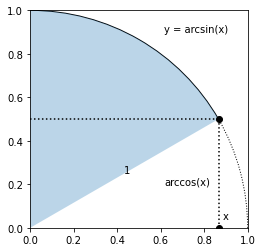

In [75]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

x = np.cos(np.radians(30))
y = np.sin(np.radians(30))

fig, ax = plt.subplots()

arc1 = patches.Arc([0,0], 2,2, theta1=0,  theta2=30, linestyle=':')
arc2 = patches.Arc([0,0], 2,2, theta1=30, theta2=90)
wdg2 = patches.Wedge([0,0], 1, theta1=30, theta2=90, fill=True, alpha=0.3)
ax.add_patch(arc1)
ax.add_patch(arc2)
ax.add_patch(wdg2)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_aspect("equal")
plt.plot(x, 0, "ok")
plt.plot(x, y, "ok")
plt.plot([0,x],[y,y], 'k:')
plt.plot([x,x],[0,y], 'k:')
plt.text(x/2, y/2, '1')
plt.text(x+.02, .04, 'x')
plt.text(x-.25, .9,  'y = arcsin(x)')
plt.text(x-.25, .2,  'arccos(x)')
plt.show()

* [Binomial theorem - Wikipedia](https://en.wikipedia.org/wiki/Binomial_theorem)
  - "Isaac Newton is generally credited with the generalized binomial theorem, valid for any rational exponent."
    - 「アイザック・ニュートンは、一般に、任意の有理数の指数に対して有効な一般二項定理を導いたとされている。」

$$
  (x + y)^r = \sum_{k=0}^\infty {r \choose k} x^{r-k} y^k
$$

$\sqrt{1-x^2} = (1-x^2)^\frac{1}{2}$ を二項級数に展開する:
  * [Binomial series - Wikipedia](https://en.wikipedia.org/wiki/Binomial_series)

In [25]:
(1-x**2)**(1/2)

(1 - x**2)**0.5

In [26]:
series((1-x**2)**(1/2))

1 - 0.5*x**2 - 0.125*x**4 + O(x**6)

In [5]:
nsimplify(series((1-x**2)**(1/2), x, 0, 10))

1 - x**2/2 - x**4/8 - x**6/16 - 5*x**8/128 + O(x**10)

積分する。多項式なので項ごとに積分できる:

In [6]:
nsimplify(integrate(series((1-x**2)**(1/2), x, 0, 10), x))

x - x**3/6 - x**5/40 - x**7/112 - 5*x**9/1152 + O(x**11)

これらによって、$\sin(x)$ の逆関数 $\sin^{-1}(x) = \arcsin(x)$ の級数展開はすぐに求められる:

In [54]:
arcsin_x = 2 * integrate(series((1-x**2)**(1/2), x, 0, 10), x) - expand(x * series((1-x**2)**(1/2), x, 0, 10))
nsimplify(arcsin_x)

x + x**3/6 + 3*x**5/40 + 5*x**7/112 + 35*x**9/1152 + O(x**11)

$0.1$ と $1$ のときの値を求める:

In [51]:
arcsin_x.removeO().subs(x,.1), asin(.1)

(0.100167421161560, 0.100167421161560)

In [57]:
arcsin_x.removeO().subs(x,1.), asin(1.)

(1.31669146825397, 1.57079632679490)

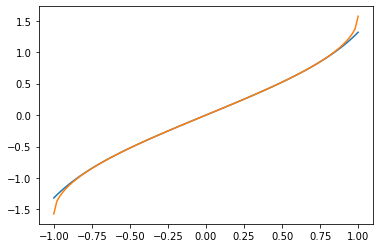

In [79]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-1, 1, 100)
Y = [arcsin_x.removeO().subs(x,xi) for xi in X]
plt.plot(X, Y)
plt.plot(X, np.arcsin(X))

検算:

In [10]:
series(asin(x),x, 0, 15)

x + x**3/6 + 3*x**5/40 + 5*x**7/112 + 35*x**9/1152 + 63*x**11/2816 + 231*x**13/13312 + O(x**15)

### Newtonの力業

恒等式 $\sin^{-1}(\sin(x)) = x$ がなりたつ。さらに、$\sin(x)$ の級数展開を
$\sin(x) = a_{0} + a_{1} x + a_{2} x^2 + a_{3} x^3 + \cdots$ とおいて、上で得られた $\sin^{-1}(x)$ の級数展開式へ代入しする。変数 $x$ の係数が、一次のみ $1$、それ以外の次数では $0$ となることから、順次 $a_{0}, a_{1}, a_{2},...$ を求める。 

$$
  \begin{align}
    \sin(x) &\approx a_{0} \\
    \sin(x) &\approx a_{0} + a_{1} x \\
    \sin(x) &\approx a_{0} + a_{1} x + a_{2} x^2 \\
    \sin(x) &\approx a_{0} + a_{1} x + a_{2} x^2 + a_{3} x^3 \\
  \end{align}
$$

In [58]:
a=symbols('a:11', Real=True)
sin_x=a[0]+a[1]*x+a[2]*x**2+a[3]*x**3+a[4]*x**4+a[5]*x**5+a[6]*x**6+a[7]*x**7+a[8]*x**8+a[9]*x**9
sol=[[a[0],0],[a[1],0],[a[2],0],[a[3],0],[a[4],0],[a[5],0],[a[6],0],[a[7],0],[a[8],0],[a[9],0]]
sol

[[a0, 0],
 [a1, 0],
 [a2, 0],
 [a3, 0],
 [a4, 0],
 [a5, 0],
 [a6, 0],
 [a7, 0],
 [a8, 0],
 [a9, 0]]

In [59]:
sin_x.subs(sol)

0

In [60]:
ax=Symbol('ax', real=True)

In [61]:
sol[1][1]=ax
sol

[[a0, 0],
 [a1, ax],
 [a2, 0],
 [a3, 0],
 [a4, 0],
 [a5, 0],
 [a6, 0],
 [a7, 0],
 [a8, 0],
 [a9, 0]]

In [62]:
sin_x.subs(sol)

ax*x

In [63]:
bx=nsimplify(expand(arcsin_x.removeO().subs(x, sin_x.subs(sol))))
bx

35*ax**9*x**9/1152 + 5*ax**7*x**7/112 + 3*ax**5*x**5/40 + ax**3*x**3/6 + ax*x

恒等式 $\sin^{-1}(\sin(x)) = x$ より、多項式の係数を比較すると、恒等式が成立する条件は $a_{x} = 1$ のとき。

In [64]:
cx=poly(bx-x,x).all_coeffs()[::-1]
cx[1]

ax - 1

In [66]:
solve(cx[1],ax)

[1]

このように、$a_{0}$ から順に係数 $a_1$, $a_2$, $a_3$... を決めていくプログラムは次のようになる:

In [67]:
sol=[[a[0],0],[a[1],0],[a[2],0],[a[3],0],[a[4],0],[a[5],0],[a[6],0],[a[7],0],[a[8],0],[a[9],0]]

for i in range(10):
    sol[i][1]=ax
    print("sin(x) =", sin_x.subs(sol))
    bx=nsimplify(expand(arcsin_x.removeO().subs(x, sin_x.subs(sol))))
    cx=poly(bx-x,x).all_coeffs()[::-1]
    s=solve(cx[i],ax)
    print("a[{:d}] =".format(i), s[0])
    sol[i][1]=s[0]

nsimplify(sin_x.subs(sol))

sin(x) = ax
a[0] = 0
sin(x) = ax*x
a[1] = 1
sin(x) = ax*x**2 + x
a[2] = 0
sin(x) = ax*x**3 + x
a[3] = -1/6
sin(x) = ax*x**4 - x**3/6 + x
a[4] = 0
sin(x) = ax*x**5 - x**3/6 + x
a[5] = 1/120
sin(x) = ax*x**6 + x**5/120 - x**3/6 + x
a[6] = 0
sin(x) = ax*x**7 + x**5/120 - x**3/6 + x
a[7] = -39682539682541/200000000000000000
sin(x) = ax*x**8 - 39682539682541*x**7/200000000000000000 + x**5/120 - x**3/6 + x
a[8] = 0
sin(x) = ax*x**9 - 39682539682541*x**7/200000000000000000 + x**5/120 - x**3/6 + x
a[9] = 137786596120411/50000000000000000000


137786596120411*x**9/50000000000000000000 - 39682539682541*x**7/200000000000000000 + x**5/120 - x**3/6 + x

In [76]:
1/(39682539682541/200000000000000000)

5039.999999999833

In [87]:
1/(137786596120411/50000000000000000000)

362879.9999987318

In [94]:
import math
list(map(math.factorial, range(11)))

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800]

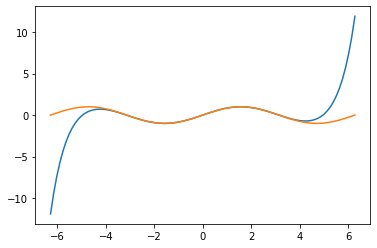

In [80]:
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-2*np.pi, 2*np.pi, 100)
Y = [sin_x.subs(sol).subs(x,xi) for xi in X]
plt.plot(X, Y)
plt.plot(X, np.sin(X))

検算:
$$
  \sin(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots
$$

In [130]:
series(sin(x),x, 0, 10)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

以下、力業で解く場合の続き:

定数項は $0$ なので、$a_{0} = 0$

In [133]:
nsimplify(expand(asx.removeO().subs(x, a[1]*x)))

35*a1**9*x**9/1152 + 5*a1**7*x**7/112 + 3*a1**5*x**5/40 + a1**3*x**3/6 + a1*x

In [117]:
poly(nsimplify(expand(asx.removeO().subs(x, a[1]*x))),x).all_coeffs()[::-1][1]

a1

$x$ の係数は $1$ なので、$a_{1} = 1$

In [134]:
nsimplify(expand(asx.removeO().subs(x, x+a[2]*x**2)))

35*a2**9*x**18/1152 + 35*a2**8*x**17/128 + 35*a2**7*x**16/32 + 5*a2**7*x**14/112 + 245*a2**6*x**15/96 + 5*a2**6*x**13/16 + 245*a2**5*x**14/64 + 15*a2**5*x**12/16 + 3*a2**5*x**10/40 + 245*a2**4*x**13/64 + 25*a2**4*x**11/16 + 3*a2**4*x**9/8 + 245*a2**3*x**12/96 + 25*a2**3*x**10/16 + 3*a2**3*x**8/4 + a2**3*x**6/6 + 35*a2**2*x**11/32 + 15*a2**2*x**9/16 + 3*a2**2*x**7/4 + a2**2*x**5/2 + 35*a2*x**10/128 + 5*a2*x**8/16 + 3*a2*x**6/8 + a2*x**4/2 + a2*x**2 + 35*x**9/1152 + 5*x**7/112 + 3*x**5/40 + x**3/6 + x

In [119]:
poly(nsimplify(expand(asx.removeO().subs(x, x+a[2]*x**2))),x).all_coeffs()[::-1][2]

a2

$a_{2} = 0$

In [135]:
nsimplify(expand(asx.removeO().subs(x, x+a[3]*x**3)))

35*a3**9*x**27/1152 + 35*a3**8*x**25/128 + 35*a3**7*x**23/32 + 5*a3**7*x**21/112 + 245*a3**6*x**21/96 + 5*a3**6*x**19/16 + 245*a3**5*x**19/64 + 15*a3**5*x**17/16 + 3*a3**5*x**15/40 + 245*a3**4*x**17/64 + 25*a3**4*x**15/16 + 3*a3**4*x**13/8 + 245*a3**3*x**15/96 + 25*a3**3*x**13/16 + 3*a3**3*x**11/4 + a3**3*x**9/6 + 35*a3**2*x**13/32 + 15*a3**2*x**11/16 + 3*a3**2*x**9/4 + a3**2*x**7/2 + 35*a3*x**11/128 + 5*a3*x**9/16 + 3*a3*x**7/8 + a3*x**5/2 + a3*x**3 + 35*x**9/1152 + 5*x**7/112 + 3*x**5/40 + x**3/6 + x

In [136]:
poly(nsimplify(expand(asx.removeO().subs(x, x+a[3]*x**3))),x).all_coeffs()[::-1]

[0,
 1,
 0,
 a3 + 1/6,
 0,
 a3/2 + 3/40,
 0,
 a3**2/2 + 3*a3/8 + 5/112,
 0,
 a3**3/6 + 3*a3**2/4 + 5*a3/16 + 35/1152,
 0,
 3*a3**3/4 + 15*a3**2/16 + 35*a3/128,
 0,
 3*a3**4/8 + 25*a3**3/16 + 35*a3**2/32,
 0,
 3*a3**5/40 + 25*a3**4/16 + 245*a3**3/96,
 0,
 15*a3**5/16 + 245*a3**4/64,
 0,
 5*a3**6/16 + 245*a3**5/64,
 0,
 5*a3**7/112 + 245*a3**6/96,
 0,
 35*a3**7/32,
 0,
 35*a3**8/128,
 0,
 35*a3**9/1152]

In [137]:
poly(nsimplify(expand(asx.removeO().subs(x, x+a[3]*x**3))),x).all_coeffs()[::-1][3]

a3 + 1/6

$a_{3} + \frac{1}{6} = 0$ より、$a_{3} = - \frac{1}{6}$

In [142]:
poly(nsimplify(expand(asx.removeO().subs(x, x-1/6*x**3+a[5]*x**5))),x).all_coeffs()[::-1][5]

a5 - 1/120

$a_{5} - \frac{1}{120} = 0$ より、$a_{5} = \frac{1}{120}$

$a_7$ は計算精度がたりない・・・

In [153]:
poly(nsimplify(expand(asx.removeO().subs(x, x-1/6*x**3+1/120*x**5+a[7]*x**7))),x).all_coeffs()[::-1][7]

a7 + 39682539682541/200000000000000000

In [151]:
200000000000000000/39682539682541

5039.999999999833